# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\75 Day\EDA-DAY3\honda_car_selling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   kms Driven  999 non-null    object
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    object
 5   Car Model   999 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [4]:
df.columns

Index(['Year', 'kms Driven', 'Fuel Type', 'Suspension', 'Price', 'Car Model'], dtype='object')

In [6]:
df.shape

(999, 6)

In [7]:
df.head(5)

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


# Data Cleaning

## Making a backup copy

In [8]:
Backup=df.copy()

## Cleaning Year Column

In [9]:
df['Year'].unique()

array([2019, 2021, 2018, 2020, 2015, 2016, 2014, 2017, 2022, 2013, 2012,
       2010, 2011, 2008, 2009, 2023, 2007, 2005, 2004, 2003, 2006, 2000],
      dtype=int64)

## Cleaning kms Driven Column 

In [10]:
df['kms Driven']=df['kms Driven'].str.strip()

In [11]:
df['kms Driven']=df['kms Driven'].str.strip().str.get(0)

In [12]:
df['kms Driven']=df['kms Driven'].astype('int')

## Cleaning Fuel Type Column 

In [13]:
df['Fuel Type'].unique()

array([' Petrol ', ' Diesel ', ' CNG '], dtype=object)

In [15]:
df['Fuel Type']=df['Fuel Type'].str.strip()

In [17]:
df['Fuel Type']=df['Fuel Type'].astype('category')

## Cleaning Suspension Column 

In [19]:
df['Suspension'].unique()

array([' Automatic', ' Manual'], dtype=object)

In [20]:
df['Suspension']=df['Suspension'].str.strip()

In [21]:
df['Suspension']=df['Suspension'].astype('category')

## Cleaning Price Column 

In [24]:
df['Price'].unique

<bound method Series.unique of 0      <bound method Series.unique of 0        9.29 L...
1      <bound method Series.unique of 0        9.29 L...
2      <bound method Series.unique of 0        9.29 L...
3      <bound method Series.unique of 0        9.29 L...
4      <bound method Series.unique of 0        9.29 L...
                             ...                        
994    <bound method Series.unique of 0        9.29 L...
995    <bound method Series.unique of 0        9.29 L...
996    <bound method Series.unique of 0        9.29 L...
997    <bound method Series.unique of 0        9.29 L...
998    <bound method Series.unique of 0        9.29 L...
Name: Price, Length: 999, dtype: object>

In [25]:
df['Price']=df['Price'].str.strip()

In [31]:
def price_cleaner(values):
    output = values.split()
    result = [eval(i) for i in output]
    return np.prod(result)

# Convert "Price" column to string type
df["Price"] = df["Price"].astype(str)

# Apply string operations
df["Price"] = df["Price"].str.strip()
df["Price"] = df["Price"].str.replace(',', '')
df["Price"] = df["Price"].str.replace('Lakh', '100000')
df["Price"] = df["Price"].map(price_cleaner)


NameError: name 'nan' is not defined

In [34]:
#Refrence ChatGPT
def price_cleaner(values):
    output = values.split()
    result = []
    for i in output:
        try:
            result.append(eval(i))
        except (NameError, SyntaxError):
            # Handle 'nan' or invalid expressions
            pass
    return np.prod(result)

# Convert "Price" column to string type
df["Price"] = df["Price"].astype(str)

# Apply string operations
df["Price"] = df["Price"].str.strip()
df["Price"] = df["Price"].str.replace(',', '')
df["Price"] = df["Price"].str.replace('Lakh', '100000')
df["Price"] = df["Price"].map(price_cleaner)


In [35]:
df["Price"] = df["Price"].astype(int)

## Cleaning Car Model Column 

In [36]:
df['Car Model'].unique()

array(['Honda City V CVT', 'Honda City ZX CVT',
       'Honda City i-VTEC CVT ZX', 'Honda City i VTEC V',
       'Honda City i DTEC S', 'Honda Jazz 1.5 SV i DTEC',
       'Honda City i DTEC VX', 'Honda WR-V i-VTEC VX',
       'Honda Amaze V CVT Petrol ', 'Honda Jazz 1.2 V i VTEC',
       'Honda City VX MT', 'Honda City i VTEC VX',
       'Honda Amaze S i-Vtech', 'Honda Jazz 1.2 V AT i VTE',
       'Honda Amaze S Petrol', 'Honda WR-V i-DTEC VX',
       'Honda Jazz 1.5 S i DTEC', 'Honda Amaze S i-DTEC',
       'Honda Amaze S i-Dtech', 'Honda City i DTEC V',
       'Honda City VX CVT', 'Honda Brio S MT', 'Honda Brio S Option MT',
       'Honda Brio 1.2 S MT', 'Honda Amaze V CVT Diesel ',
       'Honda Jazz 1.2 VX i VTEC', 'Honda Amaze VX AT i-Vtech',
       'Honda City V MT', 'Honda Amaze VX i-DTEC', 'Honda City ZX MT',
       'Honda City i VTEC SV', 'Honda Brio 1.2 VX MT',
       'Honda Amaze E i-DTEC', 'Honda City i VTEC CVT VX',
       'Honda City i DTEC SV', 'Honda Amaze VX i-Vtech',


In [37]:
df["Car Model"] = df["Car Model"].str.split(" ").str.slice(start = 0,stop = 3).str.join(" ")

In [44]:
df.isnull().sum()

Year          0
kms Driven    0
Fuel Type     0
Suspension    0
Price         0
Car Model     0
dtype: int64

## Save the Cleaned File

In [38]:
df.to_csv('Cleaned_Car_Model_Data.csv')

# Data Visualization

In [47]:
df.columns

Index(['Year', 'kms Driven', 'Fuel Type', 'Suspension', 'Price', 'Car Model'], dtype='object')

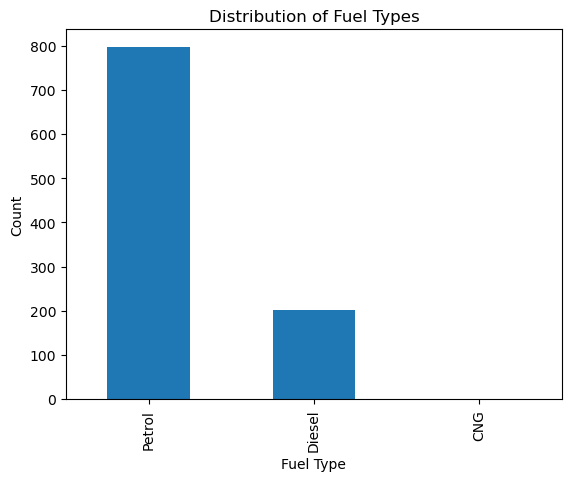

In [48]:
fuel_type_counts = df['Fuel Type'].value_counts()
fuel_type_counts.plot(kind='bar')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

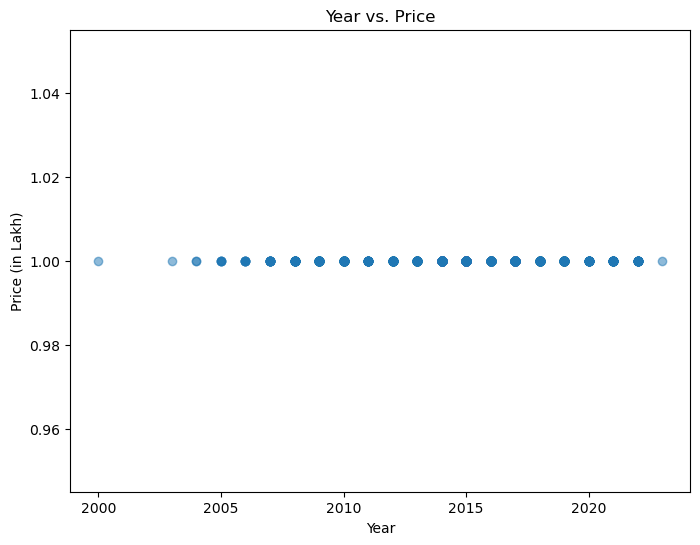

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Year'], df['Price'], alpha=0.5)
plt.title('Year vs. Price')
plt.xlabel('Year')
plt.ylabel('Price (in Lakh)')
plt.show()

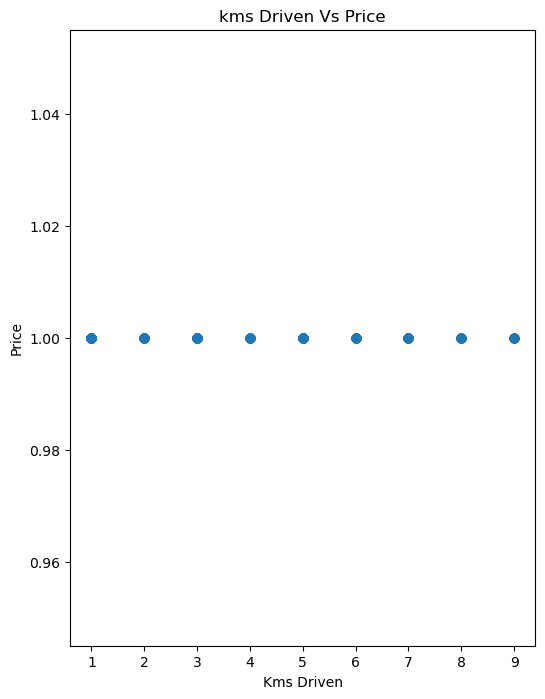

In [52]:
plt.figure(figsize=(6,8))
plt.scatter(df['kms Driven'],df['Price'],alpha=0.5)
plt.title("kms Driven Vs Price")
plt.xlabel("Kms Driven")
plt.ylabel("Price")
plt.show()

# Thank You for Reading!